In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
# Load the data
df = pd.read_csv('Sales Data.csv')

In [ ]:
df['Sales Date'] = pd.to_datetime(df['Sales Date'], format='%m-%d-%y')

In [ ]:
# Aggregate daily sales
daily_sales = df.groupby('Sales Date')['Total Sales'].sum().reset_index()

In [ ]:
# Rename columns to match Prophet requirements
daily_sales = daily_sales.rename(columns={'Sales Date': 'ds', 'Total Sales': 'y'})

In [ ]:
# Create and fit the model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(daily_sales)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9q8i29rl/3tt6ofqu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9q8i29rl/i8fp6prh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55485', 'data', 'file=/tmp/tmp9q8i29rl/3tt6ofqu.json', 'init=/tmp/tmp9q8i29rl/i8fp6prh.json', 'output', 'file=/tmp/tmp9q8i29rl/prophet_model2t8rb83_/prophet_model-20241214153527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:35:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:35:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Generate future dates for forecasting (e.g., next 365 days)
future_dates = model.make_future_dataframe(periods=365)

In [ ]:
# Make predictions
forecast = model.predict(future_dates)

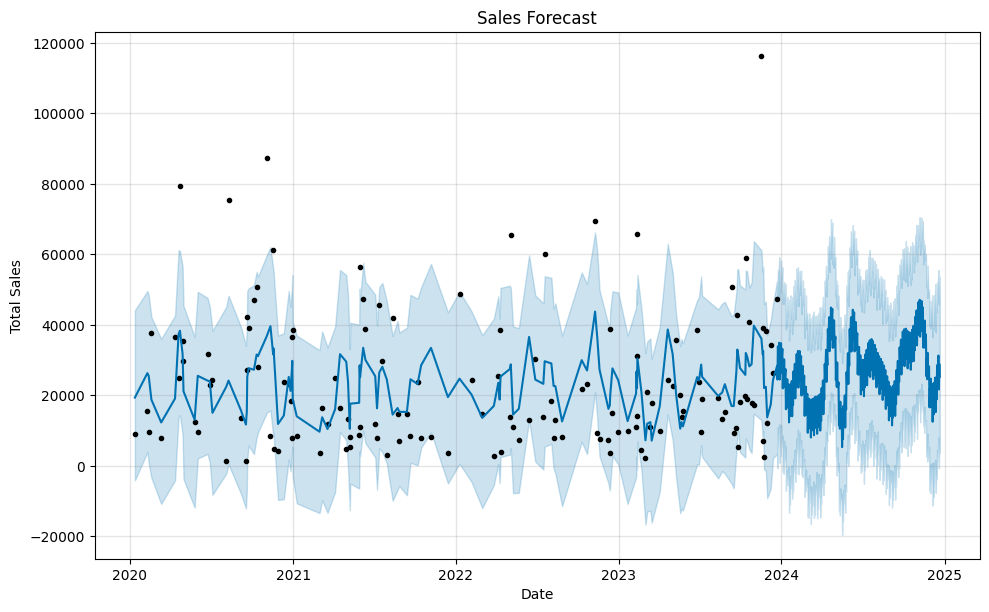

In [ ]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

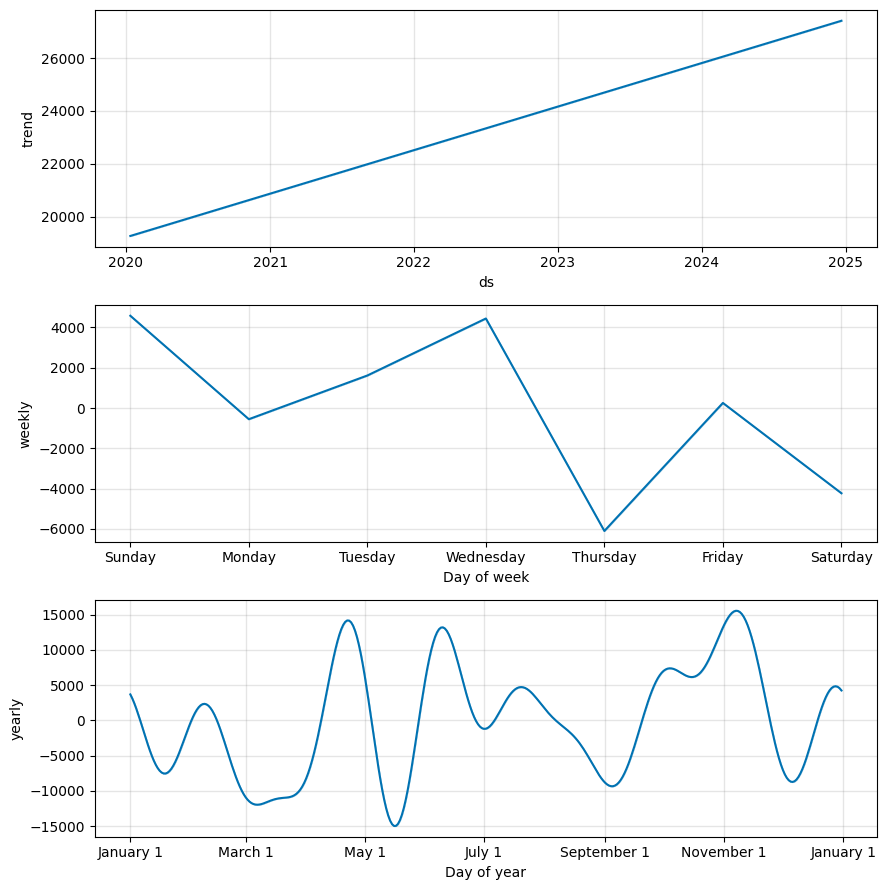

In [ ]:
# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
# Print the forecast for the next 30 days
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(36))

            ds          yhat    yhat_lower    yhat_upper
468 2024-11-16  33552.333977   9415.511588  60575.635073
469 2024-11-17  41245.744082  16822.629805  62781.270186
470 2024-11-18  34911.922421  11541.286402  58583.366038
471 2024-11-19  35819.198883  13030.443434  59714.333211
472 2024-11-20  37337.003340  12914.651035  60237.355345
473 2024-11-21  25443.678669   2528.303423  50591.659617
474 2024-11-22  30440.697210   5577.125156  53869.061399
475 2024-11-23  24601.645536   1219.001124  47692.737509
476 2024-11-24  32077.995844   9163.860921  56824.880721
477 2024-11-25  25645.534742   2178.782642  51018.393811
478 2024-11-26  26575.665449   2465.219078  48671.271542
479 2024-11-27  28238.848076   5460.262589  49960.249811
480 2024-11-28  16612.372193  -7032.140283  39721.480869
481 2024-11-29  21994.569237   -589.123727  45342.973041
482 2024-11-30  16653.830075  -7782.929557  39035.953802
483 2024-12-01  24734.445855    655.406759  46796.801101
484 2024-12-02  19003.142161  -

In [ ]:
# Assuming you have already created the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('sales_forecast.csv', index=False)
